# RBC Model

by **Professor Throckmorton**  
for *Time Series Econometrics*  
W&amp;M ECON 408/PUBP 616  
<a href="rbc-model.slides.html">Slides</a>

## Summary

- Introduce a nonlinear theoretical model of business cycles.
- Get the equilibrium conditions and linear the system of equations.
- Solve the linear system, i.e., express (observable) endogenous variables as functions of (hidden) state variables.
- Estimate the state vector with the Kalman filter.
- The following example is a simplified exposition of Chad Fulton's RBC example in Python here: [https://www.chadfulton.com/topics/estimating_rbc.html](https://www.chadfulton.com/topics/estimating_rbc.html)

## The Model

- A social planner chooses how much to consume, work, and invest, $\{c_{t+j},n_{t+j},i_{t+j}\}_{j=0}^\infty$, to maximize present value lifetime utility

  $$
  E_t \sum_{j=0}^\infty \beta^j [\log(c_{t+j}) - \psi n_{t+j}]
  $$

  subject to:

  - resource constraint: $y_t = c_t+i_t$
  - capital accumulation: $k_t = (1−\delta)k_{t-1}+i_t$
  - production function: $y_t = z_t k_{t-1}^\alpha n_t^{1 - \alpha}$
  - Total factor productivity (TFP):  
    $\log z_t = (1-\rho)\bar{z} + \rho \log z_{t-1} + \eta_t$ where $\eta_t \sim N(0, \sigma^2)$

- $E_t$ is an expectation operator conditional data through time $t$, i.e., it's a forecast because TFP is random/stochastic

### Parameters

- This model has the following parameters

| Parameter   | Description                  | Parameter   | Description            |
|-------------|------------------------------|-------------|------------------------|
| $\beta$     | Discount factor              | $\rho$      | TFP shock persistence  |
| $\psi$      | Marginal disutility of work  | $\sigma^2$  | TFP shock variance     |
| $\delta$    | Capital depreciation rate    | $\alpha$    | Capital-share of output|


- Example parameterization

| Parameter                        | Value  | Parameter                           | Value  |
|----------------------------------|--------|-------------------------------------|--------|
| $\beta = $                          | 0.95   | $\rho = $                              | 0.85   |
| $\psi = $                           | 3      | $\sigma^2 = $                          | 0.04   |
| $\delta = $                         | 0.025  | $\alpha = $                            | 0.36   |

- The ultimate goal is to estimate (some of) these parameters.

### Equilibrium

- The RBC model is a **constrained optimization** problem which can be written as a Lagrangian with the following first order conditions (i.e., **equilibrium conditions**).

- In equilibrium, the marginal benefit (i.e., utility) of a unit of consumption today equals the marginal cost (i.e., lost future utility) forgoing the future return on a unit of investment:

  $$
  \frac{1}{c_t} = E_t \left \{\beta  \frac{1}{c_{t+1}} \left [ r_{t+1} + (1 - \delta) \right ] \right \}
  $$

  where $1/c_t$ is the marginal utility of consumption and $r_t = \alpha y_t/k_{t-1}$ is the marginal product of capital.

- In equilibrium, the marginal benefit (i.e., utility) of work equals the marginal cost (i.e., disutility) of work.

  $$
  \psi = \frac{1}{c_t} w_t
  $$

  where $w_t = (1 - \alpha) y_t/n_t$ is the marginal product of work.

- Including the constraints completes the **nonlinear equilibrium system**.

### Linear System

- The linearized equilibrium system of equations is
  
  \begin{gather*}
    - \gamma \hat{c}_t = - \gamma E_t\hat{c}_{t+1} + \beta rE_t\hat{r}_{t+1} \\
    \hat{r}_t = \hat{y}_t-\hat{k}_{t-1}\\
    \hat{c}_t = \hat{w}_t  \\
    \hat{w}_t = \hat{y}_t - \hat{n}_t\\
    y \hat{y}_t = c\hat{c}_t + i\hat{i}_t \\
    k\hat{k}_t = (1-\delta)k\hat{k}_{t-1} + i\hat{i}_t \\
    \hat{y}_t = \hat{z}_t + \alpha\hat{k}_{t-1}+(1-\alpha)\hat{n}_t\\
    \hat{z}_t = \rho \hat{z}_{t-1} + \sigma \eta_t
  \end{gather*}

- The state variables for this system are $(k_{t-1}, z_{t-1})$, i.e., the social planner needs to know those to make decisions at $t$.

- There are 8 variables, $\{c,r,y,k,w,n,i,z\}$, which (importantly!) equals the number of equations.

- This is a linear model with (rational) expectations/forecasts, i.e., the social planner forecasts with full understanding of the structure of the model, the initial conditions/state, $(k_{t-1}, z_{t-1})$, and the distribution of TFP.
- A solution to the model expresses the endogenous variables $(y_t, c_t, i_t, n_t)$ **as functions of the state** variables $(k_{t-1}, z_{t-1})$.
- We can obtain the solution with methods in Blanchard-Kahn (1980) or Chris Sims' [gensys](http://sims.princeton.edu/yftp/gensys/).
- The solution to the linear system is represented in state-space form.

### Solution

- **Observation equation(s)**:

\begin{gather*}
\begin{bmatrix}
\hat y_t \\
\hat n_t \\
\hat c_t \\
\end{bmatrix}
= \begin{bmatrix}
1 - \frac{1-\alpha}{\alpha} \phi_{ck} & \frac{1}{\alpha} - \frac{1-\alpha}{\alpha} \phi_{cz} \\
1 - \frac{1}{\alpha} \phi_{ck} & \frac{1}{\alpha} \left [ 1 - \phi_{cz} \right ] \\
\phi_{ck} & \phi_{cz} \\
\end{bmatrix}
\begin{bmatrix}
\hat k_{t} \\
\hat z_{t}
\end{bmatrix}
+ \begin{bmatrix}
 \varepsilon_{1,t} \\
 \varepsilon_{2,t}
\end{bmatrix}
\end{gather*}

- **State equation(s)**:

\begin{gather*}
\begin{bmatrix}
\hat k_t \\
\hat z_t \\
\end{bmatrix} = \begin{bmatrix}
T_{kk} & T_{kz}\\
0 & \rho \\
\end{bmatrix}
\begin{bmatrix}
\hat k_{t-1} \\
\hat z_{t-1}
\end{bmatrix} + \begin{bmatrix}
0 \\
1
\end{bmatrix}
\eta_t
\end{gather*}

- Given the above parameterization, the solution is

| Parameter   | Value  |
|-------------|--------|
| $\phi_{ck}$ | 0.534  |
| $\phi_{cz}$ | 0.487  |
| $T_{kk}$    | 0.884  |
| $T_{kz}$    | 0.319  |
| $\alpha$    | 0.36   |


## Business Cycle Data

- In the RBC model, $\hat{x}_t \equiv 100\times(x_t/\bar{x} -1)$ where $\bar{x}$ is the (constant) long-run equilibrium.

- **Q:** What is the equivalent object in time series data with stochastic or time trends?

- The **Hodrick-Prescott** (HP) filter is one (of many) mathematical tool(s) used to decompose a time series $x_t$ into:
  - $\tau_t$: A **smooth trend** component capturing both time and stochastic trends
  - $c_t$: A **cyclical** component, i.e., the object of interest for business cycle economists

- In other words, we can express the data as percent changes from a "long run equilbrium", $\hat{x}_t = 100(x_t/\tau_t - 1)$, i.e., percent deviations from trend.

- In business cycle research, other popular choices are the [band-pass filter](https://en.wikipedia.org/wiki/Band-pass_filter#Economics) and Hamilton filter.

- [James Hamilton](https://econweb.ucsd.edu/~jhamilto/) wrote [a critque of the HP filter](https://econweb.ucsd.edu/~jhamilto/hp.pdf), and then created "a better alternative," which now has over 2000 citations as of Spring 2025.


- The HP filter finds the trend $\tau_t$ by solving a minimization problem:

  $$
  \min_{\tau_t} \sum_{t=1}^T (y_t - \tau_t)^2 + \lambda \sum_{t=2}^{T-1} \left[(\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1})\right]^2
  $$

  - **First term**: $(y_t - \tau_t)^2$ makes the trend close to the actual data.
  - **Second term**: $\left[(\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1})\right]^2$ penalizes sharp changes in the slope of the trend, enforcing smoothness.

- $\lambda$ influences the smoothness of the resulting trend
  - **Small $\lambda$** → Trend follows the data closely (e.g., wiggly trend with "sharp" changes).
  - **Large $\lambda$** → Trend is very smooth (e.g., nearly a straight line).
  - Common Choices for $\lambda$
    - $\lambda = 1600$ for quarterly data
    - $\lambda = 14400$ for monthly data
    - $\lambda = 100$ for annual data

### Reading Data

In [1]:
# Libraries
from fredapi import Fred
import pandas as pd
# Setup acccess to FRED
fred_api_key = pd.read_csv('fred_api_key.txt', header=None).iloc[0,0]
fred = Fred(api_key=fred_api_key)
# Series to get
series = ['GDP','PRS85006023','PCE','GDPDEF','USREC']
rename = ['gdp','hours','cons','price','rec']
# Get and append data to list
dl = []
for idx, string in enumerate(series):
    var = fred.get_series(string).to_frame(name=rename[idx])
    dl.append(var)
    print(var.head(2)); print(var.tail(2))

            gdp
1946-01-01  NaN
1946-04-01  NaN
                  gdp
2025-01-01  29962.047
2025-04-01  30331.117
              hours
1947-01-01  117.931
1947-04-01  117.425
             hours
2024-10-01  97.923
2025-01-01  97.888
             cons
1959-01-01  306.1
1959-02-01  309.6
               cons
2025-05-01  20615.2
2025-06-01  20685.2
             price
1947-01-01  11.141
1947-04-01  11.299
              price
2025-01-01  127.429
2025-04-01  128.059
            rec
1854-12-01  1.0
1855-01-01  0.0
            rec
2025-05-01  0.0
2025-06-01  0.0


In [2]:
# Concatenate data to create data frame (time-series table)
rawm = pd.concat(dl, axis=1).sort_index()
# Resample/reindex to quarterly frequency
raw = rawm.resample('QE').last().dropna()
# real GDP
raw['rgdp'] = raw['gdp']/raw['price']
# real Consumption
raw['rcons'] = raw['cons']/raw['price']
# Display dataframe
display(raw)

gdp    hours     cons    price  rec        rgdp       rcons
1959-03-31    510.330  114.850    312.7   15.224  0.0   33.521414   20.539937
1959-06-30    522.653  115.194    318.2   15.248  0.0   34.276823   20.868311
1959-09-30    525.034  114.834    324.2   15.307  0.0   34.300255   21.179852
1959-12-31    528.600  114.570    322.9   15.367  0.0   34.398386   21.012559
1960-03-31    542.648  114.326    330.2   15.428  0.0   35.172932   21.402645
...               ...      ...      ...      ...  ...         ...         ...
2024-03-31  28624.069   97.792  19553.2  124.163  0.0  230.536223  157.480087
2024-06-30  29016.714   97.869  19747.5  124.943  0.0  232.239613  158.052072
2024-09-30  29374.914   97.802  20044.1  125.532  0.0  234.003394  159.673231
2024-12-31  29723.864   97.923  20408.1  126.257  0.0  235.423493  161.639355
2025-03-31  29962.047   97.888  20578.5  127.429  0.0  235.127381  161.489928

[265 rows x 7 columns]

### HP Filter

The vector of observable endogenous variables is $[\hat y_t, \hat n_t, \hat c_t]$, where $\hat{x}_t = 100(x_t/\tau_t - 1)$ and $\tau_t$ is the smooth trend from the HP filter.

In [3]:
# Hodrick-Prescott filter
from statsmodels.tsa.filters.hp_filter import hpfilter
# Smothing parameter for quarterly data
lam = 1600
# Raw data to detrend
vars = ['rgdp','hours','rcons']
nvar = len(vars)
# Detrend raw data
data = pd.DataFrame()
for var in vars:
    cycle, trend = hpfilter(raw[var],lam)
    data[var] = 100*(raw[var]/trend - 1)

C:\Users\rabbitrun\miniconda3\Lib\site-packages\statsmodels\tsa\filters\hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
C:\Users\rabbitrun\miniconda3\Lib\site-packages\statsmodels\tsa\filters\hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
C:\Users\rabbitrun\miniconda3\Lib\site-packages\statsmodels\tsa\filters\hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


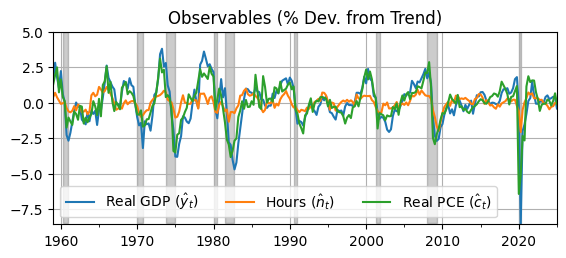

In [4]:
ax = data.plot(); ax.grid(); ax.set_title('Observables (% Dev. from Trend)')
ax.legend([r'Real GDP ($\hat y_t$)',r'Hours ($\hat n_t$)',r'Real PCE ($\hat c_t$)'],ncol=3);
fig = ax.get_figure(); fig.set_size_inches(6.5,2.5)
# Shade NBER recessions
usrec = rawm['3/31/1959':'12/31/2024']['rec']
ax.fill_between(usrec.index, -8.5, 5, where=usrec.values, color='k', alpha=0.2)
ax.autoscale(tight=True)

## RBC Model in Python

Set the parameters in the state space model, which represents the solution to the linearized RBC model.

In [5]:
# Define the state space model
#  Parameters
phick = 0.534; phicz = 0.487
Tkk = 0.884; Tkz = 0.319
alpha = 0.36; rho = 0.85; sigma2 = 0.4;

Simplified **Observation (Measurement) Equation**: $\mathbf{y}_t = \mathbf{\mathbf{Z}} \mathbf{x}_t + \boldsymbol{\boldsymbol{\varepsilon}}_t$ where $\boldsymbol{\varepsilon}_t \sim N(0, \mathbf{H})$

\begin{gather*}
\small
\begin{bmatrix}
\hat y_t \\
\hat n_t \\
\hat c_t \\
\end{bmatrix}
= \begin{bmatrix}
1 - \frac{1-\alpha}{\alpha} \phi_{ck} & \frac{1}{\alpha} - \frac{1-\alpha}{\alpha} \phi_{cz} \\
1 - \frac{1}{\alpha} \phi_{ck} & \frac{1}{\alpha} \left [ 1 - \phi_{cz} \right ] \\
\phi_{ck} & \phi_{cz} \\
\end{bmatrix}
\begin{bmatrix}
\hat k_{t} \\
\hat z_{t}
\end{bmatrix}
+ \begin{bmatrix}
 \varepsilon_{1,t} \\
 \varepsilon_{2,t}
\end{bmatrix}
\end{gather*}

In [6]:
# Scientific computing
import numpy as np
# Observation equation
Z11 = 1 - (1-alpha)*phick/alpha
Z12 = 1/alpha - (1-alpha)*phicz/alpha
Z21 = 1 - phick/alpha
Z22 = (1-phicz)/alpha
Z31 = phick
Z32 = phicz
Z = np.array([[Z11,Z12],[Z21,Z22],[Z31,Z32]])
H = 1e-8*np.eye(nvar)
display(Z)
display(H)

array([[ 0.05066667,  1.912     ],
       [-0.48333333,  1.425     ],
       [ 0.534     ,  0.487     ]])

array([[1.e-08, 0.e+00, 0.e+00],
       [0.e+00, 1.e-08, 0.e+00],
       [0.e+00, 0.e+00, 1.e-08]])

Simplified **State (Transition) Equation**: $\mathbf{x}_t = \mathbf{F} \mathbf{x}_{t-1} + \boldsymbol{\boldsymbol{\eta}}_t$ where $\boldsymbol{\eta}_t \sim N(0, \mathbf{Q})$

\begin{gather*}
\begin{bmatrix}
\hat k_t \\
\hat z_t \\
\end{bmatrix} = \begin{bmatrix}
T_{kk} & T_{kz}\\
0 & \rho \\
\end{bmatrix}
\begin{bmatrix}
\hat k_{t-1} \\
\hat z_{t-1}
\end{bmatrix} + 
\boldsymbol{\boldsymbol{\eta}}_t
\end{gather*}

In [7]:
# Transition equation
F = [[Tkk,Tkz],[0,rho]]
Q = [[0,0],[0,sigma2]]
display(F)
display(Q)

[[0.884, 0.319], [0, 0.85]]

[[0, 0], [0, 0.4]]

### Kalman Filter

In [8]:
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter
# Initialize the Kalman filter
kf = KalmanFilter(k_endog=nvar, k_states=2)
kf.design = Z
kf.obs_cov = H
kf.transition = F
kf.state_cov = Q
#   Initial state vector mean and covariance
kf.initialize_known(constant=np.zeros(2), stationary_cov=Q)

In [9]:
# Extract data from Dataframe as NumPy array
observations = np.array(data)
# Convert data to match the required type
observations = np.asarray(observations, order="C", dtype=np.float64)
# Bind the data to the KalmanFilter object
kf.bind(observations)

# Extract filtered state estimates
res = kf.filter()
filtered_state_means = res.filtered_state
filtered_state_covariances = res.filtered_state_cov
display(filtered_state_means.shape)
display(filtered_state_covariances.shape)

(2, 265)

(2, 2, 265)

### Filtered (Estimated) States

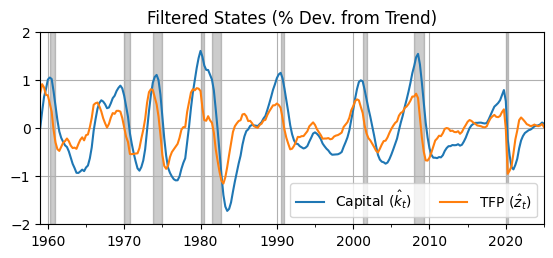

In [10]:
xhat = pd.DataFrame(filtered_state_means.T,index=data.index)
ax = xhat.plot(); ax.grid(); ax.set_title('Filtered States (% Dev. from Trend)')
fig = ax.get_figure(); fig.set_size_inches(6.5,2.5)
ax.legend([r'Capital ($\hat k_t$)',r'TFP ($\hat z_t$)'],ncol=2);
# Shade NBER recessions
ax.fill_between(usrec.index, -2, 2, where=usrec.values, color='k', alpha=0.2)
ax.autoscale(tight=True)

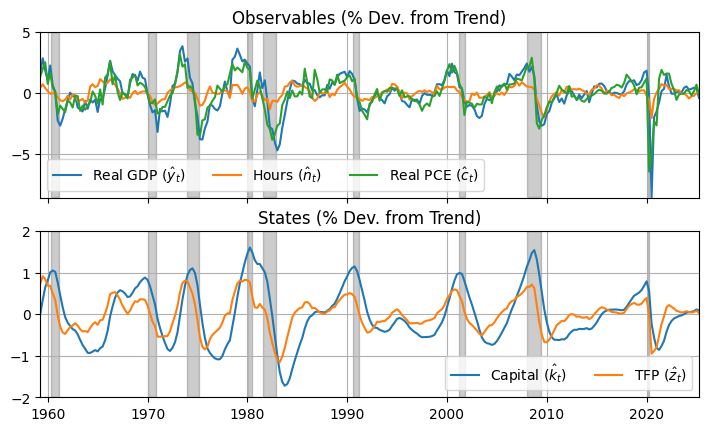

In [11]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,figsize=(6.5,4)); fig.set_size_inches(8.5,4.75)
axs[0].plot(data); axs[0].grid(); axs[0].set_title('Observables (% Dev. from Trend)')
axs[0].legend([r'Real GDP ($\hat y_t$)',r'Hours ($\hat n_t$)',r'Real PCE ($\hat c_t$)'],ncol=3);
axs[0].fill_between(usrec.index, -8.5, 5, where=usrec.values, color='k', alpha=0.2)
axs[1].plot(xhat); axs[1].grid(); axs[1].set_title('States (% Dev. from Trend)')
axs[1].legend([r'Capital ($\hat k_t$)',r'TFP ($\hat z_t$)'],ncol=2);
axs[1].fill_between(usrec.index, -2, 2, where=usrec.values, color='k', alpha=0.2)
axs[0].label_outer(); axs[0].autoscale(tight=True); axs[1].autoscale(tight=True)

### Parameter Estimation

In [12]:
loglike = res.llf
print(f"Log-likelihood: {loglike}")

Log-likelihood: -35931612459.28382


- Kalman filter produces log likelihood for this parameterization
- We could do a better job calibrating some parameters like the discount factor ($\beta$) and the labor preference parameter ($\psi$)
- Then we could search the parameter space for TFP process parameters, $\{\rho,\sigma^2\}$, that maximize the log likelihood.
- This model is very simple.
  - We could change the utility function to add a risk aversion parameter.
  - We could add investment adjustment costs and variable capital utilization.
  - We could add demand shocks from government spending or monetary policy.